In [ ]:
!git clone https://github.com/WaShindeiru/IceCubeNeutrino

In [ ]:
!cp -r IceCubeNeutrino/* .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip ./drive/MyDrive/icecube/ice_cube_small.zip

In [ ]:
!unzip ./drive/MyDrive/icecube/iceCube_result.zip

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from Resnet import resnet34
from Icecube_Dataloader import IceCube_Dataloader, collate_fn

In [2]:
model = resnet34(pretrained = False)
model.fc = nn.Sequential(nn.ReLU(),nn.Linear(in_features=512, out_features=2)) # Changed FC layer for our task
model.load_state_dict(torch.load("./weights/model_34_2025-07-06_16:43:54.pth", weights_only=True))
model.eval()

ResNet(
  (conv1): Conv2d(5, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
pqfile = '/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/train_meta.parquet'
path_batch = '/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/train/'
geometry = "/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/sensor_geometry.csv"

batch_num=2
lr = 1e-06
num_epochs = 1
batch_size = 16

In [4]:
from torch.utils.data import DataLoader

ice_dataset = IceCube_Dataloader(pqfile, path_batch, geometry, batch_num)
train_dataset = ice_dataset
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=collate_fn, num_workers=11)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

## Testy resnet34

In [6]:
data_iter = iter(train_dataloader)

In [7]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label'].to(device)

result = model(input_tensor.to(device))

input tensor shape: torch.Size([16, 5, 1, 786])
label shape: torch.Size([16, 2])


In [8]:
def compare(label, result):
    assert label.shape == result.shape
    x = label.shape[0]
    for i in range(x):
        print(f"Correct: {label[i, :].detach().cpu().numpy()}, predicted: {result[i, :].detach().cpu().numpy()}")

In [9]:
compare(label, result)

Correct: [4.397665  2.2143948], predicted: [1.9483231 1.6097548]
Correct: [5.430101  2.9032795], predicted: [2.0004783 1.6220359]
Correct: [4.7456374 1.3124967], predicted: [1.9978738 1.6024829]
Correct: [5.42572   1.4795985], predicted: [2.034683  1.5650815]
Correct: [3.9254432 1.2506934], predicted: [1.9861519 1.5895268]
Correct: [1.3749152  0.96741647], predicted: [1.9851906 1.613675 ]
Correct: [5.5646963 1.2833916], predicted: [1.9429914 1.5754207]
Correct: [5.708021  1.5951016], predicted: [1.9975343 1.5963908]
Correct: [0.5401932 2.187957 ], predicted: [1.8957686 1.5834278]
Correct: [2.0293329 1.8986098], predicted: [2.0331178 1.6481997]
Correct: [3.0536447 1.897843 ], predicted: [1.9524449 1.5815985]
Correct: [6.134015  2.7823713], predicted: [1.9729887 1.5674831]
Correct: [4.4677167 1.3895506], predicted: [1.9656101 1.5944726]
Correct: [0.10932269 1.1180297 ], predicted: [1.8771157 1.5970734]
Correct: [3.9420083 1.1789559], predicted: [1.9094834  0.75285566]
Correct: [5.376932 

In [10]:
loss_function = nn.MSELoss().to(device)

In [11]:
temp = loss_function(result.float(),label.float())
print(temp)

tensor(3.7186, device='cuda:0', grad_fn=<MseLossBackward0>)


In [12]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([16, 5, 1, 33])
label shape: torch.Size([16, 2])


In [13]:
compare(label, result)

Correct: [4.2949843  0.33460286], predicted: [2.257765  1.1518523]
Correct: [5.335549  2.5136642], predicted: [2.3548791 1.2228577]
Correct: [2.2436514 2.9453225], predicted: [2.0978334 1.3821902]
Correct: [6.277991  1.1981549], predicted: [2.0189981 1.5058638]
Correct: [5.2724237 1.7981626], predicted: [2.036771   0.99653256]
Correct: [2.7499993 1.9752115], predicted: [2.1900542 1.4911759]
Correct: [4.6812196 0.6479384], predicted: [2.805194  1.5376837]
Correct: [6.1379375  0.18163848], predicted: [2.2704751 1.4526802]
Correct: [0.48181045 1.6517323 ], predicted: [2.2315345 1.6387252]
Correct: [5.69833   0.8398638], predicted: [2.3746479 1.6550001]
Correct: [6.0985894 0.9503003], predicted: [2.2342227 1.0776012]
Correct: [3.8776577 2.2384274], predicted: [2.0128396 1.3435627]
Correct: [3.941763 2.246588], predicted: [2.2610488 1.2476597]
Correct: [1.1873281 2.1487179], predicted: [2.4104965 1.7650554]
Correct: [1.3566753 1.5088042], predicted: [2.0675483 1.9021677]
Correct: [1.6210183

In [14]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([16, 5, 1, 104])
label shape: torch.Size([16, 2])


In [15]:
compare(label, result)

Correct: [1.7770674 1.3811553], predicted: [1.8324454 1.0439242]
Correct: [2.6062903 1.6628194], predicted: [2.246242  1.2911413]
Correct: [2.7812552 2.4555678], predicted: [2.208418  1.0987362]
Correct: [2.3901987 2.3327715], predicted: [1.9034594 1.1790682]
Correct: [4.7693815 2.6294289], predicted: [2.2013412 1.3762187]
Correct: [3.8770719 1.8333825], predicted: [2.2375054 1.0771124]
Correct: [4.8191257 2.3260767], predicted: [1.7474555 0.5200403]
Correct: [4.8231425 1.1643972], predicted: [1.8076267 1.195889 ]
Correct: [0.10072412 1.513027  ], predicted: [2.050593  1.1935041]
Correct: [2.453142 2.158957], predicted: [2.1753807 0.7579514]
Correct: [2.1155186 1.3646456], predicted: [2.3931363 1.8283591]
Correct: [5.834114  1.9247692], predicted: [2.561394   0.82682395]
Correct: [2.9756424 2.5532286], predicted: [1.7525096 1.3225337]
Correct: [5.607259  2.5118067], predicted: [1.4377604 1.161516 ]
Correct: [2.4335985  0.77164686], predicted: [1.7800137 1.0373625]
Correct: [3.8612154 1

In [16]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([16, 5, 1, 52])
label shape: torch.Size([16, 2])


In [17]:
compare(label, result)

Correct: [0.1329636 0.4343483], predicted: [1.5550076 1.3620895]
Correct: [5.053898  1.8201983], predicted: [1.7092788 1.0607864]
Correct: [1.928945  2.8029127], predicted: [2.0650134 1.2048354]
Correct: [4.7169447 2.2500472], predicted: [1.7756007 1.0486251]
Correct: [5.145785  0.5590584], predicted: [2.3381212 1.5356127]
Correct: [4.3982606 2.4885614], predicted: [1.9251239 1.5567034]
Correct: [5.1110864 1.5810479], predicted: [5.6591177 2.2623315]
Correct: [4.0615015  0.97197276], predicted: [2.1068146 1.6311255]
Correct: [5.0086584 0.9778753], predicted: [2.1951241 1.3582615]
Correct: [4.548884  1.5877146], predicted: [1.6644316 1.4001328]
Correct: [2.8561356 1.5274273], predicted: [2.1964362 1.1647329]
Correct: [4.5604796 2.0574627], predicted: [2.0275207 1.4981273]
Correct: [1.6195437  0.44587815], predicted: [1.8238049 1.5018625]
Correct: [5.258256  1.8469656], predicted: [2.10698   1.1461197]
Correct: [2.1657481 0.5103805], predicted: [2.2197154 1.3584996]
Correct: [5.0345592 2

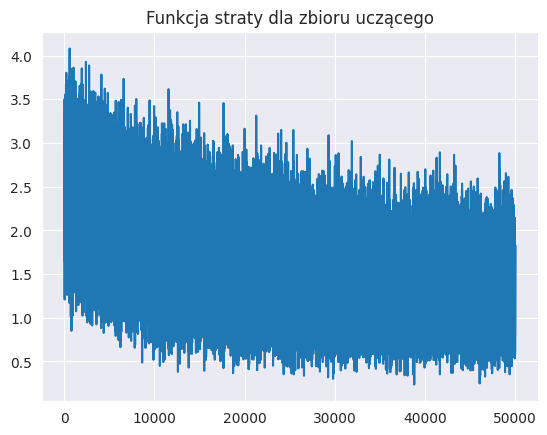

In [18]:
import pickle

with open('./results/losses_2025-07-06_16:43:54.pickle', 'rb') as f:
    data = pickle.load(f)

plt.figure()
plt.title("Funkcja straty dla zbioru uczącego")
plt.plot(data)

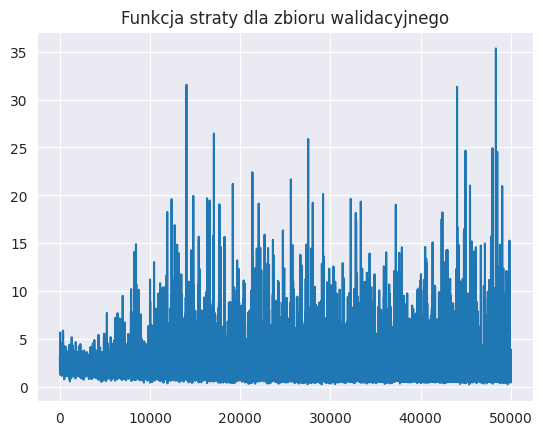

In [19]:
with open('./results/val_losses_2025-07-06_16:43:54.pickle', 'rb') as f:
    data = pickle.load(f)

plt.figure()
plt.title("Funkcja straty dla zbioru walidacyjnego")
plt.plot(data)

In [20]:
def angles_to_unit_vector(angle_array):
    azimuth = angle_array[:, 0]
    zenith = angle_array[:, 1]

    x = np.sin(zenith) * np.cos(azimuth)
    y = np.sin(zenith) * np.sin(azimuth)
    z = np.cos(zenith)

    return np.stack([x, y, z], axis=1)

In [21]:
import numpy as np

num_of_examples = 100
losses_ = []
residual_cache = []
loss_total = 0.

for i in range(num_of_examples):
    example = next(data_iter)
    input_tensor = example['input_tensor'].to(device)
    label = example['label'].to(device)

    result = model(input_tensor)

    loss_value = loss_function(result.float().cpu(),label.float().cpu())
    losses_.append(loss_value.item())

    temp_result = angles_to_unit_vector(result.cpu().detach().numpy())
    temp_label = angles_to_unit_vector(label.cpu().detach().numpy())

    temp_ = np.clip(np.sum(temp_result * temp_label, axis=1), -1, 1)
    residuals = np.degrees(np.arccos(temp_))
    residual_cache.append(residuals.mean())

print(f"average loss: {np.mean(losses_)}")
print(f"Median loss: {np.median(losses_)} ")

average loss: 4.969091364145279
Median loss: 2.9768006801605225 


## Residuum

In [22]:
residual_ = np.array(residual_cache)
# residual_ = residual_.reshape(-1)
print(residual_.shape)

(100,)


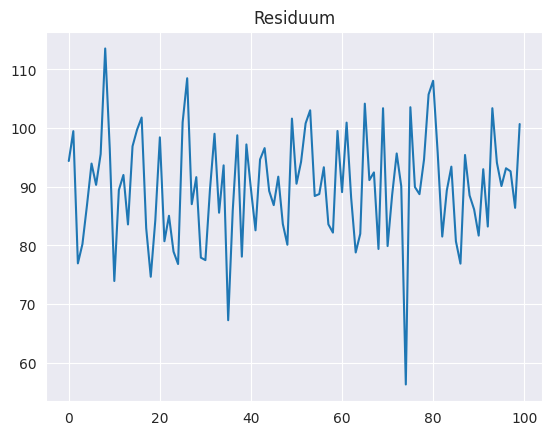

In [23]:
plt.figure()
plt.plot(residual_)
plt.title("Residuum")
plt.show()